In [4]:
#Import Library
import pandas as pd

In [6]:
#Import Dataset
data = pd.read_csv('Store Transaction Data.csv')

In [ ]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [14]:
# Fill missing values (example: forward fill method)
data.ffill(inplace=True)

In [16]:
# Ensure data types are correct
data.dtypes

MONTH        object
STORECODE    object
QTY           int64
VALUE         int64
GRP          object
SGRP         object
SSGRP        object
CMP          object
MBRD         object
BRD          object
dtype: object

In [18]:
# Create a new feature: Total transaction value
data['TOTAL_VALUE'] = data['QTY'] * data['VALUE']

In [20]:
# Descriptive statistics
data.describe()

,QTY,VALUE,TOTAL_VALUE
count,14260.000000,14260.000000,1.426000e+04
mean,16.354488,294.455330,1.458708e+04
std,34.365583,760.129558,1.066462e+05
min,0.000000,0.000000,0.000000e+00
25%,1.000000,10.000000,1.700000e+01
50%,4.000000,99.000000,4.770000e+02
75%,16.000000,283.000000,4.181000e+03
max,641.000000,24185.000000,7.303870e+06


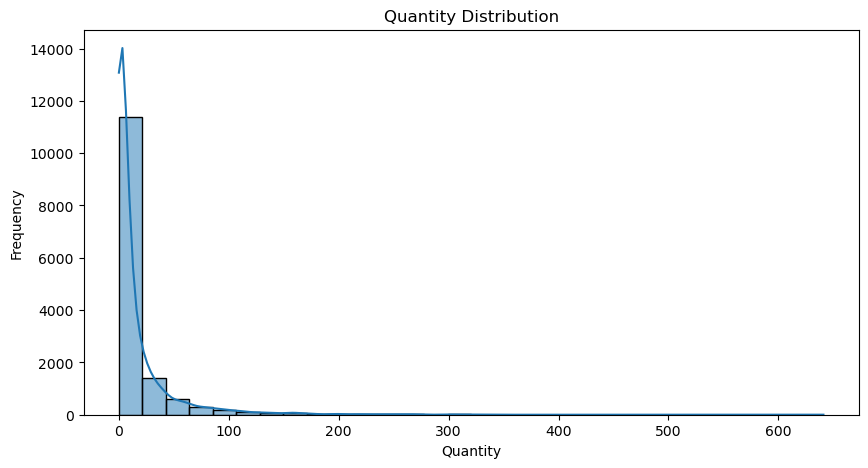

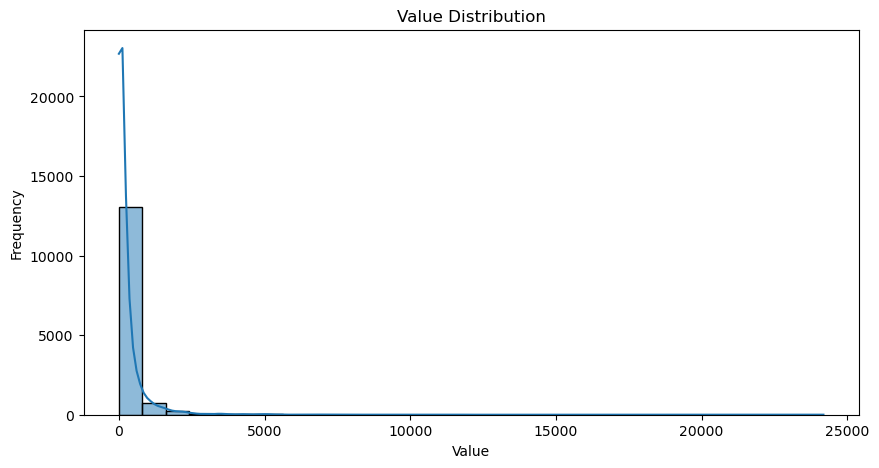

In [22]:
#Import Library
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of QTY
plt.figure(figsize=(10, 5))
sns.histplot(data['QTY'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of VALUE
plt.figure(figsize=(10, 5))
sns.histplot(data['VALUE'], bins=30, kde=True)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

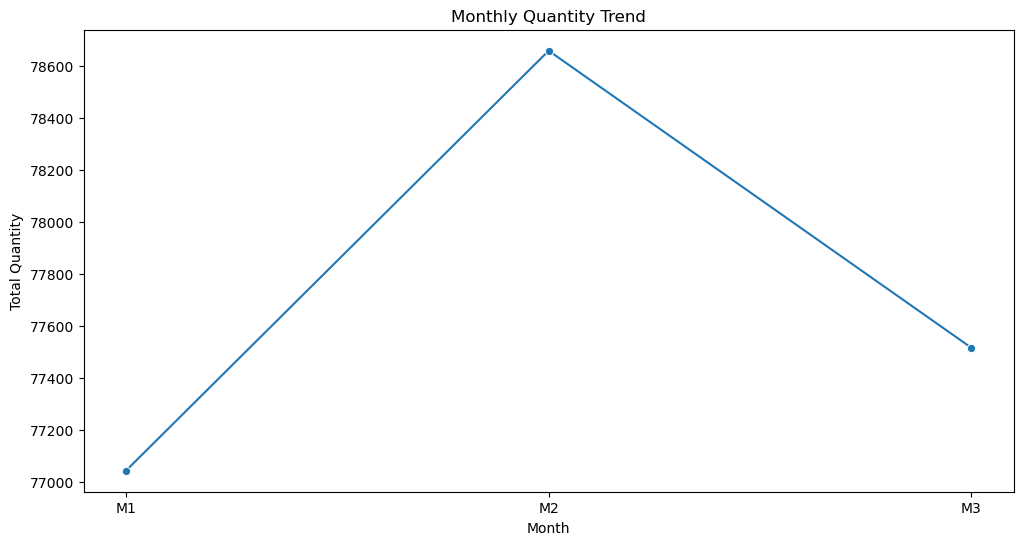

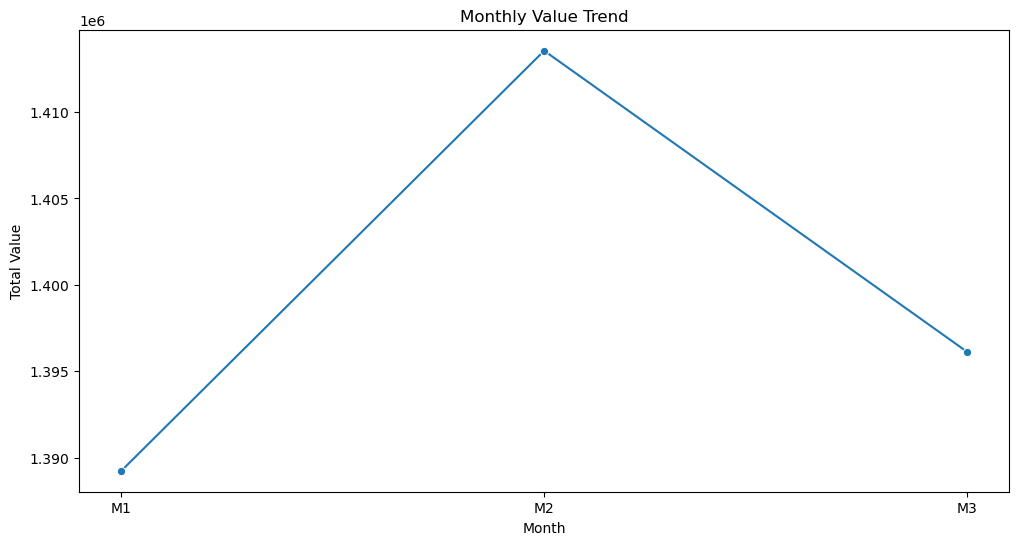

In [23]:
# Aggregate data by month
monthly_sales = data.groupby('MONTH').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot monthly quantity trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH', y='QTY', marker='o')
plt.title('Monthly Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

# Plot monthly value trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH', y='VALUE', marker='o')
plt.title('Monthly Value Trend')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.show()

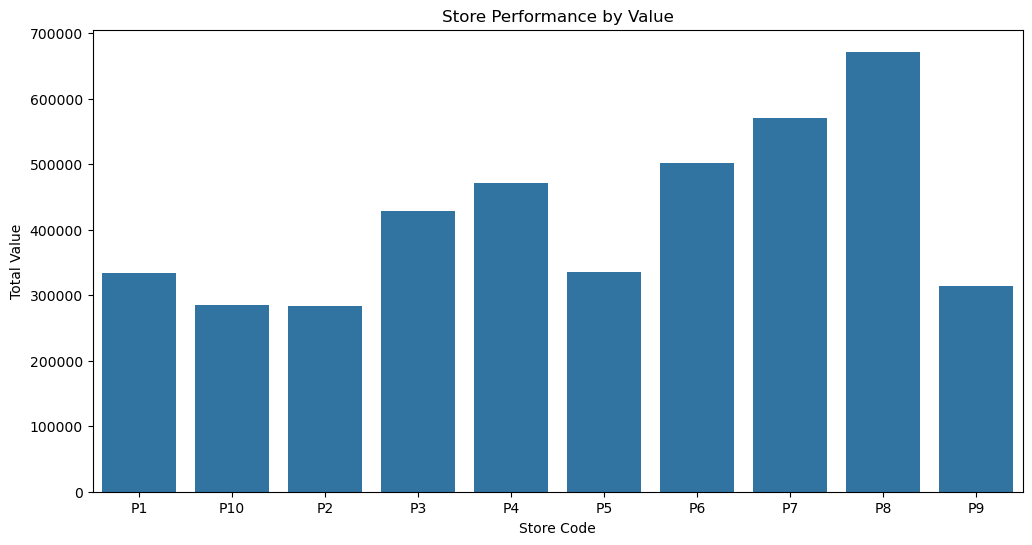

In [24]:
# Aggregate data by store
store_performance = data.groupby('STORECODE').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot store performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=store_performance, x='STORECODE', y='VALUE')
plt.title('Store Performance by Value')
plt.xlabel('Store Code')
plt.ylabel('Total Value')
plt.show()

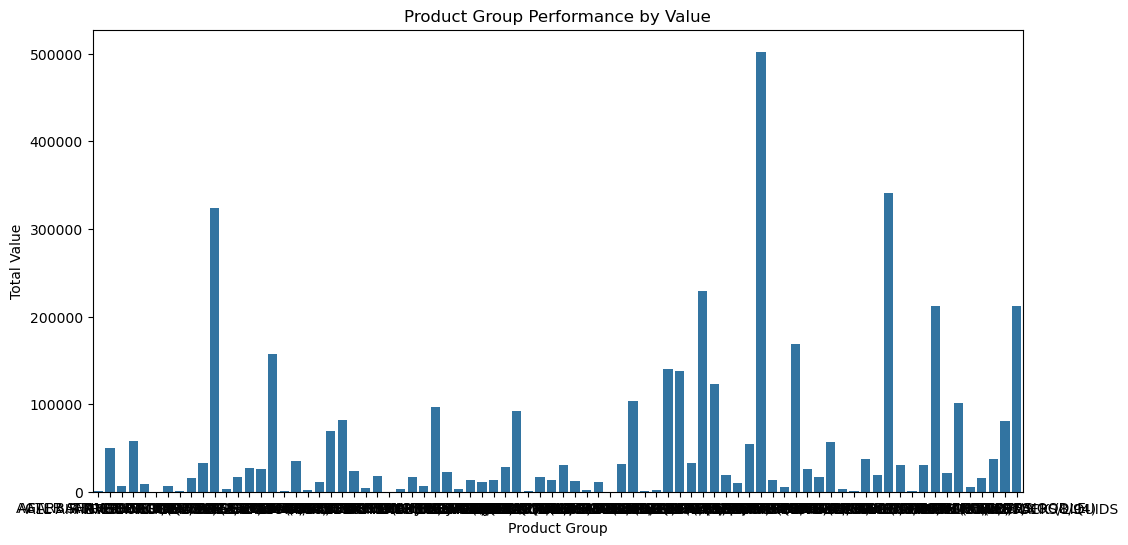

In [25]:
# Aggregate data by product group
grp_performance = data.groupby('GRP').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot product group performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=grp_performance, x='GRP', y='VALUE')
plt.title('Product Group Performance by Value')
plt.xlabel('Product Group')
plt.ylabel('Total Value')
plt.show()

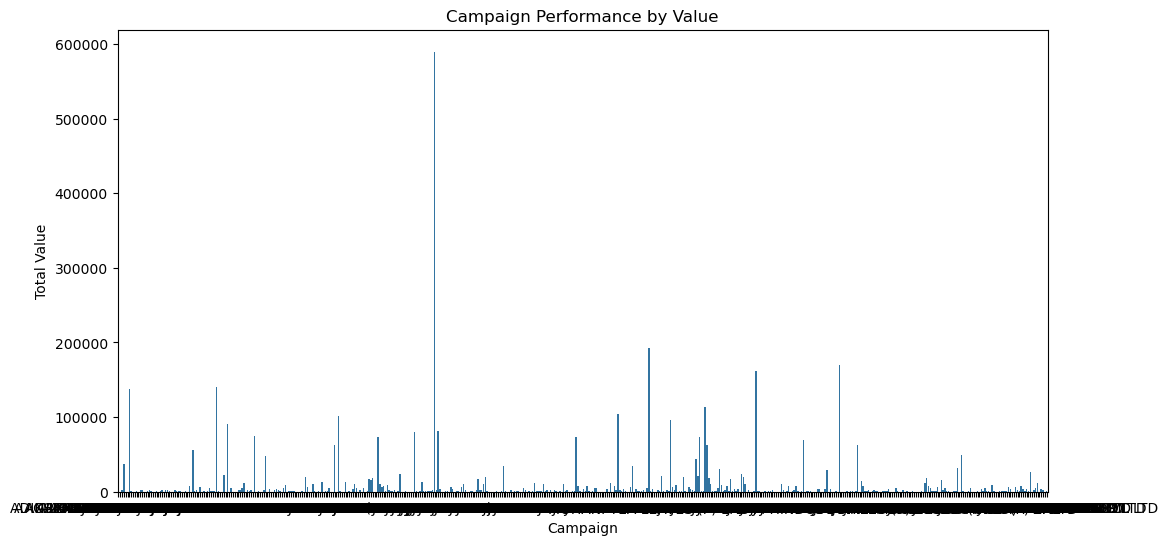

In [26]:
# Aggregate data by campaign
cmp_performance = data.groupby('CMP').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot campaign performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=cmp_performance, x='CMP', y='VALUE')
plt.title('Campaign Performance by Value')
plt.xlabel('Campaign')
plt.ylabel('Total Value')
plt.show()

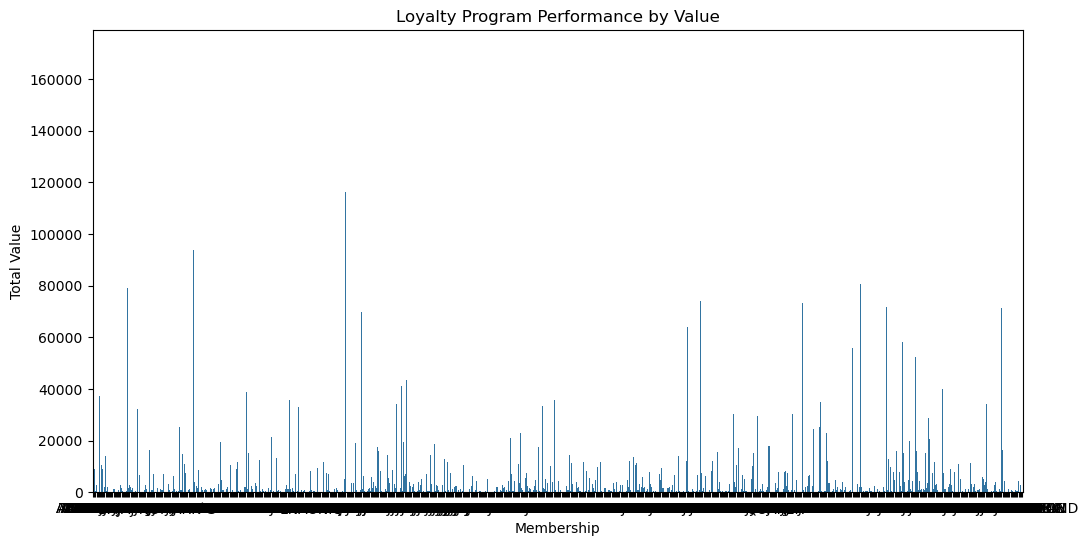

In [33]:
# Aggregate data by membership
mbrd_performance = data.groupby('MBRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot loyalty program performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=mbrd_performance, x='MBRD', y='VALUE')
plt.title('Loyalty Program Performance by Value')
plt.xlabel('Membership')
plt.ylabel('Total Value')
plt.show()

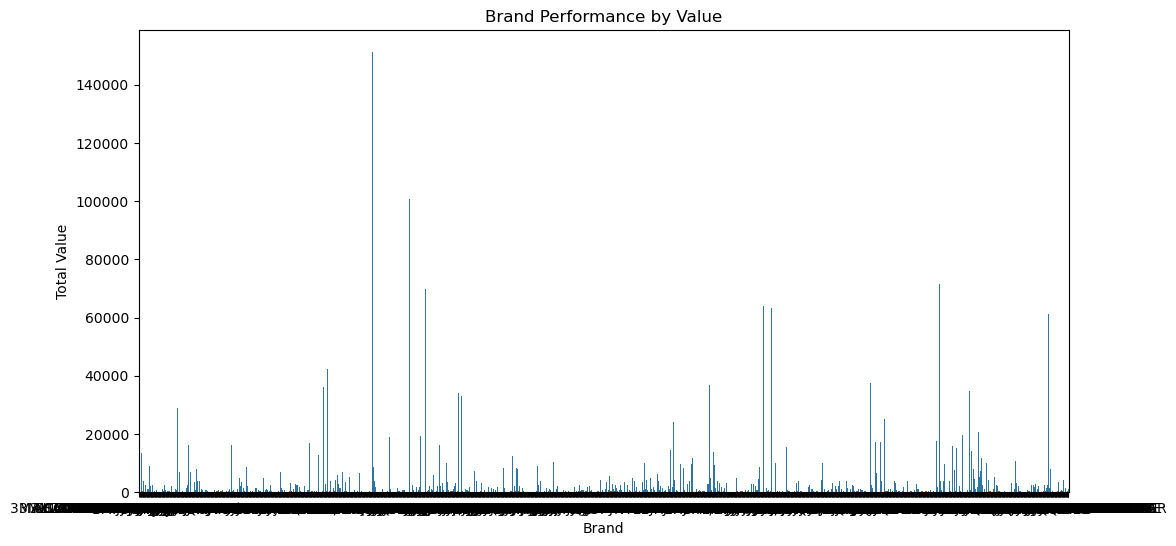

In [35]:
# Aggregate data by brand
brd_performance = data.groupby('BRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Plot brand performance by value
plt.figure(figsize=(12, 6))
sns.barplot(data=brd_performance, x='BRD', y='VALUE')
plt.title('Brand Performance by Value')
plt.xlabel('Brand')
plt.ylabel('Total Value')
plt.show()

In [37]:
# Overall Sales Trends
monthly_sales_summary = monthly_sales.describe()
print("Monthly Sales Summary:")
print(monthly_sales_summary)

# Store Performance Summary
store_performance_summary = store_performance.describe()
print("\nStore Performance Summary:")
print(store_performance_summary)

# Product Group Performance Summary
grp_performance_summary = grp_performance.describe()
print("\nProduct Group Performance Summary:")
print(grp_performance_summary)

# Campaign Performance Summary
cmp_performance_summary = cmp_performance.describe()
print("\nCampaign Performance Summary:")
print(cmp_performance_summary)

# Customer Segmentation Summary
mbrd_performance_summary = mbrd_performance.describe()
print("\nCustomer Segmentation Summary:")
print(mbrd_performance_summary)

# Brand Performance Summary
brd_performance_summary = brd_performance.describe()
print("\nBrand Performance Summary:")
print(brd_performance_summary)

Monthly Sales Summary:
                QTY         VALUE
count      3.000000  3.000000e+00
mean   77738.333333  1.399644e+06
std      830.826296  1.251477e+04
min    77042.000000  1.389256e+06
25%    77278.500000  1.392698e+06
50%    77515.000000  1.396139e+06
75%    78086.500000  1.404838e+06
max    78658.000000  1.413538e+06

Store Performance Summary:
                QTY          VALUE
count     10.000000      10.000000
mean   23321.500000  419893.300000
std     6862.919289  132596.228673
min    10483.000000  284024.000000
25%    20956.500000  318747.000000
50%    21250.500000  381818.000000
75%    27199.750000  494861.750000
max    34089.000000  671988.000000

Product Group Performance Summary:
                QTY          VALUE
count     80.000000      80.000000
mean    2915.187500   52486.662500
std     6044.118482   86481.628002
min        1.000000      22.000000
25%      181.750000    6320.750000
50%      888.000000   18291.500000
75%     2671.000000   55354.500000
max    35375

In [39]:
# Insights on High-Performing Stores
high_performing_stores = store_performance.sort_values(by='VALUE', ascending=False).head()
print("Top 5 High-Performing Stores by Value:")
print(high_performing_stores)

# Insights on Popular Product Categories
popular_product_groups = grp_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Popular Product Groups by Value:")
print(popular_product_groups)

# Insights on Campaign Success
successful_campaigns = cmp_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Successful Campaigns by Value:")
print(successful_campaigns)

# Insights on Customer Segmentation
loyalty_program_performance = mbrd_performance.sort_values(by='VALUE', ascending=False)
print("\nLoyalty Program Performance:")
print(loyalty_program_performance)

# Insights on Brand Performance
top_performing_brands = brd_performance.sort_values(by='VALUE', ascending=False).head()
print("\nTop 5 Performing Brands by Value:")
print(top_performing_brands)

Top 5 High-Performing Stores by Value:
  STORECODE    QTY   VALUE
8        P8  32003  671988
7        P7  21114  571136
6        P6  21178  502627
4        P4  34089  471566
3        P3  27602  428550

Top 5 Popular Product Groups by Value:
                              GRP    QTY   VALUE
57  REFINED EDIBLE OILS-ALL PACKS   3108  502344
68                 SPICES (03/04)  25179  341116
10     BISCUITS - CORE & NON CORE  35375  324360
52                   PACKAGED TEA   7225  229186
72           TOILET SOAPS (04/00)   7298  212570

Top 5 Successful Campaigns by Value:
                            CMP    QTY   VALUE
174  HINDUSTAN UNILEVER LIMITED  46584  589463
292      MONDELEZ INTERNATIONAL  12769  192167
397            S NARENDRA KUMAR  11510  169364
351            PROCTER & GAMBLE  10399  161658
54               BRITANNIA INDS  13211  139910

Loyalty Program Performance:
                      MBRD    QTY   VALUE
204                EVEREST  11528  170465
222                FORTUNE    6

In [41]:
# Recommendations based on insights

# 1. Improve Stock for High-Performing Stores
print("\nRecommendation 1: Improve Stock for High-Performing Stores")
print("Focus on maintaining sufficient inventory levels at top-performing stores to avoid stockouts and maximize sales opportunities.")

# 2. Focus on Popular Product Categories
print("\nRecommendation 2: Focus on Popular Product Categories")
print("Increase marketing efforts and stock levels for top product categories to meet customer demand and drive sales growth.")

# 3. Enhance Campaign Strategies
print("\nRecommendation 3: Enhance Campaign Strategies")
print("Analyze the characteristics of successful campaigns and replicate these strategies for future promotions to boost sales.")

# 4. Leverage Loyalty Programs
print("\nRecommendation 4: Leverage Loyalty Programs")
print("Encourage customer sign-ups for loyalty programs by offering exclusive benefits, which can help increase customer retention and repeat purchases.")

# 5. Promote Top-Performing Brands
print("\nRecommendation 5: Promote Top-Performing Brands")
print("Partner with top-performing brands for joint promotions and highlight these brands in marketing materials to attract more customers.")


Recommendation 1: Improve Stock for High-Performing Stores
Focus on maintaining sufficient inventory levels at top-performing stores to avoid stockouts and maximize sales opportunities.

Recommendation 2: Focus on Popular Product Categories
Increase marketing efforts and stock levels for top product categories to meet customer demand and drive sales growth.

Recommendation 3: Enhance Campaign Strategies
Analyze the characteristics of successful campaigns and replicate these strategies for future promotions to boost sales.

Recommendation 4: Leverage Loyalty Programs
Encourage customer sign-ups for loyalty programs by offering exclusive benefits, which can help increase customer retention and repeat purchases.

Recommendation 5: Promote Top-Performing Brands
Partner with top-performing brands for joint promotions and highlight these brands in marketing materials to attract more customers.
